source: https://www.youtube.com/watch?v=NuDtKkr4sq0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.utils.extmath import softmax

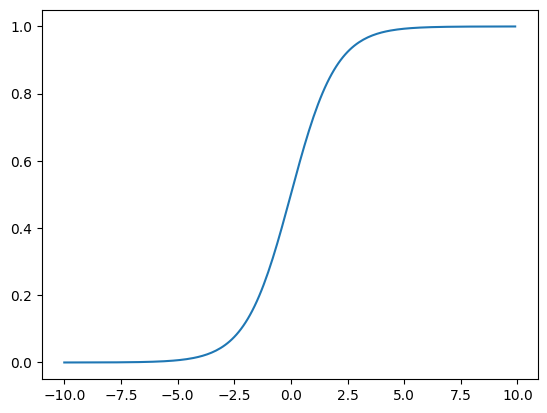

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)


In [3]:
data = datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(data['data'], columns = data["feature_names"]).drop(columns = ["petal length (cm)"])
df.insert(2, "const", 1)
df['variety'] = data["target_names"][data['target']]
df.insert(4, 'setosa', df['variety']=='setosa')
df

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
0,5.1,3.5,1,0.2,True,setosa
1,4.9,3.0,1,0.2,True,setosa
2,4.7,3.2,1,0.2,True,setosa
3,4.6,3.1,1,0.2,True,setosa
4,5.0,3.6,1,0.2,True,setosa
...,...,...,...,...,...,...
145,6.7,3.0,1,2.3,False,virginica
146,6.3,2.5,1,1.9,False,virginica
147,6.5,3.0,1,2.0,False,virginica
148,6.2,3.4,1,2.3,False,virginica


In [5]:
xcols = ['sepal length (cm)', 'sepal width (cm)', 'const']
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


## Overview

Task: to correctly predict/classify the columns: petal width (cm), setosa and variety, using the columns: sepal length (cm), sepal width (cm) and const

1. regression for pedal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

#### Generic code

reg = LinearRegression(fit_intercept=False)

reg.fit(X, y)

y2 = reg.predict(X2)

In [6]:
# regression

reg = LinearRegression(fit_intercept=False)
reg.fit(train[xcols], train["petal width (cm)"])
test['prediction'] = reg.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction
82,5.8,2.7,1,1.2,False,versicolor,1.327769
134,6.1,2.6,1,1.4,False,virginica,1.590835
114,5.8,2.8,1,2.4,False,virginica,1.279061
42,4.4,3.2,1,0.2,True,setosa,0.083889
109,7.2,3.6,1,2.5,False,virginica,1.889735
57,4.9,2.4,1,1.0,False,versicolor,0.830818
1,4.9,3.0,1,0.2,True,setosa,0.538569
70,5.9,3.2,1,1.8,False,versicolor,1.155681
25,5.0,3.0,1,0.2,True,setosa,0.610022
84,5.4,3.0,1,1.5,False,versicolor,0.895833


In [7]:
# classification

cls = LogisticRegression(fit_intercept=False)
cls.fit(train[xcols], train["setosa"])
test['prediction'] = cls.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction
82,5.8,2.7,1,1.2,False,versicolor,False
134,6.1,2.6,1,1.4,False,virginica,False
114,5.8,2.8,1,2.4,False,virginica,False
42,4.4,3.2,1,0.2,True,setosa,True
109,7.2,3.6,1,2.5,False,virginica,False
57,4.9,2.4,1,1.0,False,versicolor,False
1,4.9,3.0,1,0.2,True,setosa,True
70,5.9,3.2,1,1.8,False,versicolor,False
25,5.0,3.0,1,0.2,True,setosa,True
84,5.4,3.0,1,1.5,False,versicolor,False


In [8]:
cls.predict_proba(test[xcols])

# array[[prob of False, prob of True]]

# for example for the 1st item the probability of being False is 94% vs. being True is 6% and 
# for this reason the 1st element has been predicted to be False

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [9]:
# probabilities of being True

cls.predict_proba(test[xcols])[:, 1]

array([0.0594372 , 0.02027497, 0.08536759, 0.92943003, 0.06654275,
       0.14772055, 0.64277335, 0.25852393, 0.58548069, 0.34907247])

In [10]:
test['prob'] = cls.predict_proba(test[xcols])[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [11]:
# multi-class classification

multi = LogisticRegression(fit_intercept=False)
multi.fit(train[xcols], train["variety"])
test['prediction'] = multi.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [12]:
# reg equation - 1st model
# coefficient of the variables in our regression model
reg.coef_

array([ 0.71452794, -0.48708032, -1.5013766 ])

In [13]:
# reg.intercep_ is there because we set at the beginning fit_intercept = False

reg.intercept_

0.0

In [14]:
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

In [15]:
reg.coef_.reshape(-1, 1)

array([[ 0.71452794],
       [-0.48708032],
       [-1.5013766 ]])

In [16]:
# Now we are multiplying our new dataset with the equation parameters from Linear Regression to get
# predicted values

def reg_predict(X):
    return X @ reg.coef_.reshape(-1, 1)

reg_predict(X)

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [17]:
cls.predict(X)

C:\Users\azizt\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False, False, False,  True, False, False,  True, False,  True,
       False])

In [18]:
cls.coef_.reshape(-1, 1)

array([[-2.42108094],
       [ 3.90002306],
       [ 0.75064911]])

In [19]:
def cls_predict_proba(X):
    return X @ cls.coef_.reshape(-1, 1)

cls_predict_proba(X).reshape(-1)

array([-2.76155804, -3.87788463, -2.37155574,  2.5779668 , -2.6410506 ,
       -1.75259212,  0.58742172, -1.05365461,  0.34531362, -0.62311875])

In [20]:
def cls_predict(X):
    return X @ cls.coef_.reshape(-1, 1) > 0

cls_predict(X).reshape(-1)

array([False, False, False,  True, False, False,  True, False,  True,
       False])

In [21]:
def cls_predict_proba(X):
    return X @ cls.coef_.reshape(-1, 1)

# actually they are not probabilities as probabilities must be between 0 and 1. The function which 
# transforms these values into probabilities is called Sigmoid, the function below

cls_predict_proba(X).reshape(-1)

array([-2.76155804, -3.87788463, -2.37155574,  2.5779668 , -2.6410506 ,
       -1.75259212,  0.58742172, -1.05365461,  0.34531362, -0.62311875])

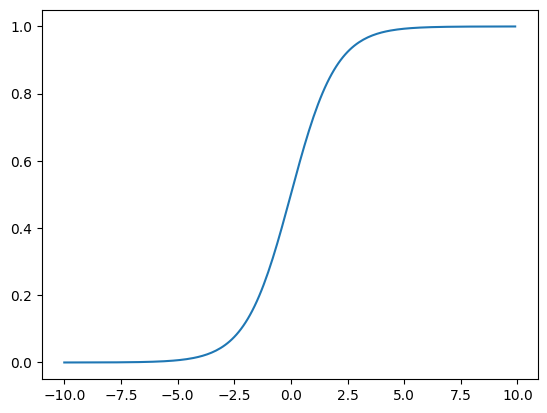

In [22]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [23]:
def cls_predict_proba(X):
    return sigmoid(X @ cls.coef_.reshape(-1, 1))

cls_predict_proba(X).reshape(-1)

# if we pay attention the output is the same value with True probability from our [False, True] 
# output above. Then False = 1 - True

array([0.0594372 , 0.02027497, 0.08536759, 0.92943003, 0.06654275,
       0.14772055, 0.64277335, 0.25852393, 0.58548069, 0.34907247])

In [24]:
cls.predict_proba(X)

C:\Users\azizt\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [25]:
cls.coef_

array([[-2.42108094,  3.90002306,  0.75064911]])

In [26]:
multi.classes_

# here 1st one is setose, so the 1st column of multi.coef_ values are the coefficients of setosa, 
# similarly, 2nd column of multi.coef_ coefficients belong to versicolor, the 3rd column coefficients
# are virginica's coefficients

# The output of multi_predict(X) function columns order also follows to this order

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
# coefficients of multi class logistic regression are not numerical values but actually is a matrix

multi.coef_

array([[-1.80097204,  3.01989635,  0.69404974],
       [ 0.64875706, -1.46308696,  1.04354373],
       [ 1.15221498, -1.55680939, -1.73759347]])

In [28]:
def multi_predict(X):
    return X @ multi.coef_.T

# actually they are not probabilities as probabilities must be between 0 and 1. The function which 
# transforms these values into probabilities is called Sigmoid, the function below

multi_predict(X)

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [29]:
(X @ multi.coef_.T).argmax(axis=1).reshape(-1,1)
# multi_predict(X) == (X @ multi.coef_.T) 
# this one returns the max value among each row from multi_predict(X)

array([[1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [0],
       [1],
       [0],
       [1]], dtype=int64)

In [30]:
multi.classes_[(X @ multi.coef_.T).argmax(axis=1).reshape(-1,1)]

# calculated predicted values -> chosen the max values -> returned corresponding class types based on
# max value positions

array([['versicolor'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['versicolor'],
       ['setosa'],
       ['versicolor']], dtype=object)

In [31]:
def multi_predict(X):
    return multi.classes_[(X @ multi.coef_.T).argmax(axis=1).reshape(-1,1)]

multi_predict(X).reshape(-1, 1)

array([['versicolor'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['versicolor'],
       ['setosa'],
       ['versicolor']], dtype=object)

# New example

### Review: Logistic Regression Coefficients

In [32]:
import numpy as np
import pandas as pd

In [33]:
# general sequence

vec2 = np.array([[1.37239431],
                 [-1.166675093],
                 [-1.32467119],
                 [6.599225245]])

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def classificatio_model(row):
    return sigmoid(row @ vec2).round().astype(bool)

## The whole stuff is the same with the algorithmic path with Logistic model

## Multi-Class Logistic Regression

When we run the Multi Class Logistic Regression instead of comparing 2 possible outcomes as it supposed to be, the Logistic Regression uses OvR method (One versus the Rest). Now Logistic Regression takes class1 vs. all the other classes as y variable

In [34]:
animals = ['dog']*50 + ['cat'] *40 + ['mouse']*20

weight = np.concatenate((
    np.random.normal(20, 7, 50),
    np.random.normal(10, 3, 40),
    np.random.normal(1, 0.3, 20)
))

In [35]:
df = pd.DataFrame({'weight': weight, 'one': 1, 'kind': animals})
df

,weight,one,kind
0,12.285239,1,dog
1,22.667058,1,dog
2,23.106653,1,dog
3,22.331652,1,dog
4,23.214973,1,dog
...,...,...,...
105,0.927234,1,mouse
106,0.770089,1,mouse
107,1.417929,1,mouse
108,1.717306,1,mouse


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train, test = train_test_split(df, stratify=df['kind'], train_size = 0.5)

In [38]:
train.head()

,weight,one,kind
107,1.417929,1,mouse
77,7.344566,1,cat
103,1.489766,1,mouse
101,0.594426,1,mouse
57,11.952987,1,cat


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()
lr.fit(train[["weight"]], train['kind'])

LogisticRegression()

In [41]:
test['predicted'] = lr.predict(test[['weight']])

In [42]:
test

,weight,one,kind,predicted
94,0.502398,1,mouse,mouse
20,18.686968,1,dog,dog
15,10.074629,1,dog,cat
24,14.789501,1,dog,dog
50,14.015119,1,cat,dog
56,12.026123,1,cat,cat
83,9.133809,1,cat,cat
13,26.427746,1,dog,dog
38,23.816074,1,dog,dog
78,16.763990,1,cat,dog


In [43]:
lr.coef_

array([[ 0.19106113],
       [ 0.91709426],
       [-1.10815539]])

In [44]:
lr.intercept_

array([ 1.62644327, -8.2619142 ,  6.63547093])

In [45]:
# pay attention to the matrix size. If they are different like that 1x3, 3x1, then we get an error.
# For this reason we have transposed one matrix here, below

coef = np.vstack((lr.coef_.T, lr.intercept_))
coef

array([[ 0.19106113,  0.91709426, -1.10815539],
       [ 1.62644327, -8.2619142 ,  6.63547093]])

In [46]:
test

,weight,one,kind,predicted
94,0.502398,1,mouse,mouse
20,18.686968,1,dog,dog
15,10.074629,1,dog,cat
24,14.789501,1,dog,dog
50,14.015119,1,cat,dog
56,12.026123,1,cat,cat
83,9.133809,1,cat,cat
13,26.427746,1,dog,dog
38,23.816074,1,dog,dog
78,16.763990,1,cat,dog


In [47]:
# test.iloc[:, :2] -> all rows & only with the 1st 2 columns

scores = test.iloc[:, :2] @ coef
scores
# the output is the test*each column of coef

,0,1,2
94,1.722432,-7.801168,6.078736
20,5.196797,8.875797,-14.072594
15,3.551313,0.977471,-4.528784
24,4.452142,5.301453,-9.753595
50,4.304188,4.591271,-8.895458
56,3.924168,2.767174,-6.691342
83,3.371559,0.114649,-3.486208
13,6.675758,15.974820,-22.650578
38,6.176769,13.579670,-19.756440
78,4.829390,7.112245,-11.941635


In [48]:
lr.classes_

array(['cat', 'dog', 'mouse'], dtype=object)

In [49]:
scores.set_axis([c+'-score' for c in lr.classes_], axis = 1)

,cat-score,dog-score,mouse-score
94,1.722432,-7.801168,6.078736
20,5.196797,8.875797,-14.072594
15,3.551313,0.977471,-4.528784
24,4.452142,5.301453,-9.753595
50,4.304188,4.591271,-8.895458
56,3.924168,2.767174,-6.691342
83,3.371559,0.114649,-3.486208
13,6.675758,15.974820,-22.650578
38,6.176769,13.579670,-19.756440
78,4.829390,7.112245,-11.941635


In [50]:
# to transform the values into the prob

scores = sigmoid(scores)
scores

,0,1,2
94,0.848442,0.000409,9.977142e-01
20,0.994496,0.999860,7.733033e-07
15,0.972113,0.726606,1.067853e-02
24,0.988481,0.995040,5.808212e-05
50,0.986668,0.989962,1.369910e-04
56,0.980624,0.940876,1.240076e-03
83,0.966804,0.528631,2.970720e-02
13,0.998740,1.000000,1.455388e-10
38,0.997927,0.999999,2.629586e-09
78,0.992072,0.999186,6.513448e-06


In [51]:
scores = scores.set_axis([c+'-score' for c in lr.classes_], axis = 1)
scores.head()

,cat-score,dog-score,mouse-score
94,0.848442,0.000409,9.977142e-01
20,0.994496,0.999860,7.733033e-07
15,0.972113,0.726606,1.067853e-02
24,0.988481,0.995040,5.808212e-05
50,0.986668,0.989962,1.369910e-04


In [52]:
pd.concat((test, scores), axis = 1)

,weight,one,kind,predicted,cat-score,dog-score,mouse-score
94,0.502398,1,mouse,mouse,0.848442,0.000409,9.977142e-01
20,18.686968,1,dog,dog,0.994496,0.999860,7.733033e-07
15,10.074629,1,dog,cat,0.972113,0.726606,1.067853e-02
24,14.789501,1,dog,dog,0.988481,0.995040,5.808212e-05
50,14.015119,1,cat,dog,0.986668,0.989962,1.369910e-04
56,12.026123,1,cat,cat,0.980624,0.940876,1.240076e-03
83,9.133809,1,cat,cat,0.966804,0.528631,2.970720e-02
13,26.427746,1,dog,dog,0.998740,1.000000,1.455388e-10
38,23.816074,1,dog,dog,0.997927,0.999999,2.629586e-09
78,16.763990,1,cat,dog,0.992072,0.999186,6.513448e-06


In [53]:
scores['mouse-score'] = scores['mouse-score'].apply(lambda x: "{:.6f}".format(x))

In [56]:
final = pd.concat((test, scores), axis = 1)
final

,weight,one,kind,predicted,cat-score,dog-score,mouse-score
94,0.502398,1,mouse,mouse,0.848442,0.000409,0.997714
20,18.686968,1,dog,dog,0.994496,0.999860,0.000001
15,10.074629,1,dog,cat,0.972113,0.726606,0.010679
24,14.789501,1,dog,dog,0.988481,0.995040,0.000058
50,14.015119,1,cat,dog,0.986668,0.989962,0.000137
56,12.026123,1,cat,cat,0.980624,0.940876,0.001240
83,9.133809,1,cat,cat,0.966804,0.528631,0.029707
13,26.427746,1,dog,dog,0.998740,1.000000,0.000000
38,23.816074,1,dog,dog,0.997927,0.999999,0.000000
78,16.763990,1,cat,dog,0.992072,0.999186,0.000007


In [55]:
from sklearn.metrics import classification_report

In [57]:
# print(classification_report(y_test, predictions))

print(classification_report(final['kind'], final['predicted']))

              precision    recall  f1-score   support

         cat       0.77      0.85      0.81        20
         dog       0.87      0.80      0.83        25
       mouse       1.00      1.00      1.00        10

    accuracy                           0.85        55
   macro avg       0.88      0.88      0.88        55
weighted avg       0.86      0.85      0.85        55



In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(final['kind'], final['predicted'])

array([[17,  3,  0],
       [ 5, 20,  0],
       [ 0,  0, 10]], dtype=int64)

In [60]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\azizt\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\azizt\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

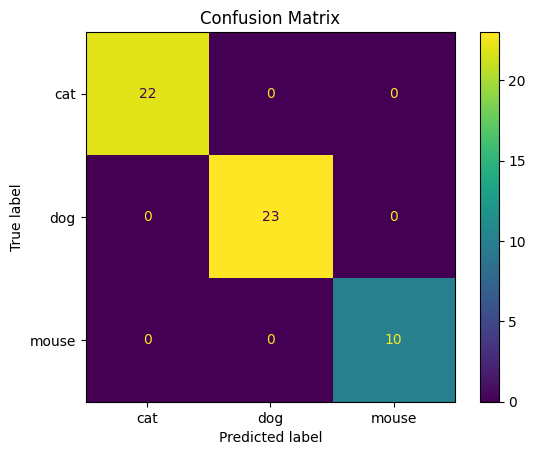

In [70]:
matrix = plot_confusion_matrix(lr, test['weight'].values.reshape(-1,1), test['predicted'])
matrix.ax_.set_title('Confusion Matrix', color = 'black')


In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

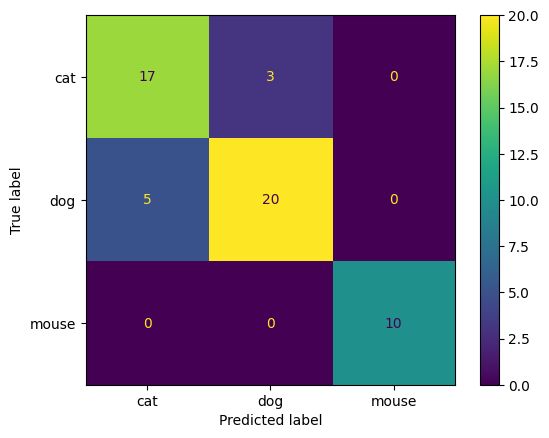

In [75]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(final['kind'], final['predicted']),
                                display_labels=lr.classes_)
cm_disp.plot()